# Implementación del modelo

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import itertools    
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.models as models
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import OneHotEncoder

import pathlib

In [70]:
data_dir = pathlib.Path('dataset')

In [71]:
image_count = len(list(data_dir.glob('*/*/*.jpg'))) + len(list(data_dir.glob('*/*/*.png')))
print("Total no of images =", image_count)

Total no of images = 12443


In [72]:
img_height = 64
img_width = 64
img_channels = 3

# Arquitectura del modelo
model = models.Sequential()
model.add(layers.Conv2D(19, (3, 3), activation="relu", input_shape = (img_height, img_width, img_channels)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(19,activation='softmax'))

In [73]:
model.compile(loss='categorical_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


In [74]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 19)        532       
                                                                 
 flatten_9 (Flatten)         (None, 73036)             0         
                                                                 
 dense_18 (Dense)            (None, 256)               18697472  
                                                                 
 dense_19 (Dense)            (None, 19)                4883      
                                                                 
Total params: 18,702,887
Trainable params: 18,702,887
Non-trainable params: 0
_________________________________________________________________


In [75]:
# Cargar el train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir / 'train',
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=None,
    label_mode='categorical'
)

# Cargar el test dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir / 'test',
    image_size=(img_height, img_width),
    batch_size=32,
    shuffle=False,
    seed=42,
    validation_split=None,
    label_mode='categorical'
)

Found 9954 files belonging to 19 classes.
Found 2489 files belonging to 19 classes.


In [76]:
epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/25
312/312 [==============================] - 123s 386ms/step - loss: 73.8804 - acc: 0.0843 - val_loss: 50.7459 - val_acc: 0.0595
Epoch 2/25
312/312 [==============================] - 118s 377ms/step - loss: 19.6727 - acc: 0.1701 - val_loss: 25.8907 - val_acc: 0.1474
Epoch 3/25
312/312 [==============================] - 120s 385ms/step - loss: 13.0099 - acc: 0.2603 - val_loss: 21.6622 - val_acc: 0.1832
Epoch 4/25
312/312 [==============================] - 118s 378ms/step - loss: 8.2486 - acc: 0.3511 - val_loss: 19.1553 - val_acc: 0.1567
Epoch 5/25
312/312 [==============================] - 116s 372ms/step - loss: 5.2035 - acc: 0.4343 - val_loss: 16.6413 - val_acc: 0.1780
Epoch 6/25
312/312 [==============================] - 115s 368ms/step - loss: 3.0293 - acc: 0.5354 - val_loss: 6.1475 - val_acc: 0.3226
Epoch 7/25
312/312 [==============================] - 118s 377ms/step - loss: 1.7010 - acc: 0.6448 - val_loss: 4.6593 - val_acc: 0.3801
Epoch 8/25
312/312 [====================

In [77]:
frame = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

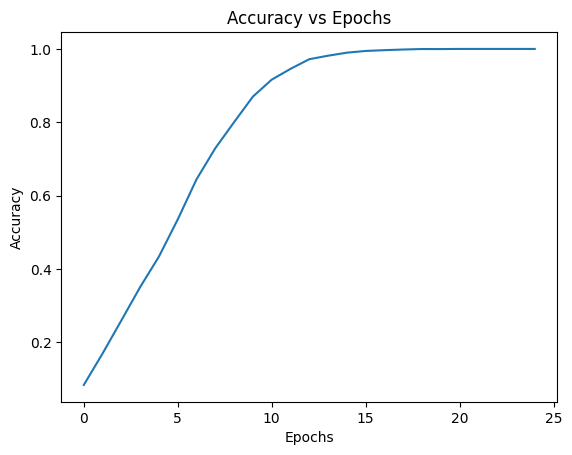

In [79]:
acc_plot = frame.plot(y="acc", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

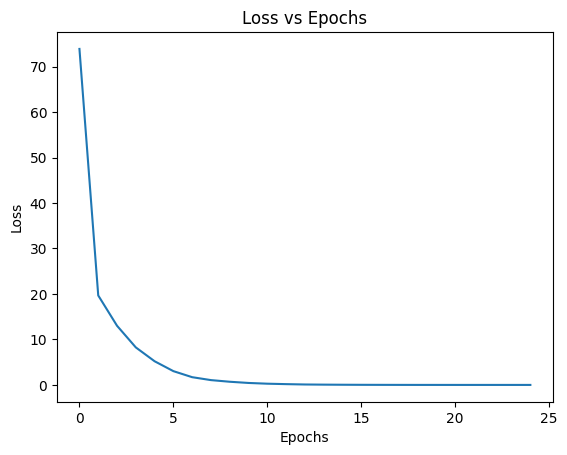

In [80]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

78/78 [==============================] - 5s 66ms/step


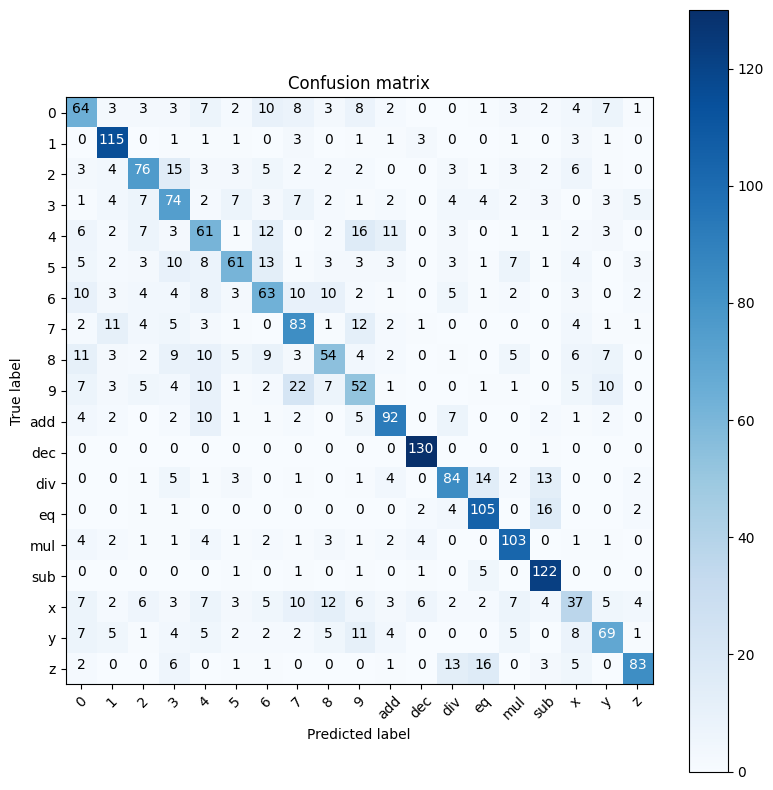

Accuracy: 0.6139011651265569


In [90]:
# Predict on the validation dataset
y_pred = model.predict(val_ds)
predicted_categories = np.argmax(y_pred, axis=1)
true_categories = np.concatenate([y for _, y in val_ds], axis=0)
true_categories = np.argmax(true_categories, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_categories, predicted_categories)

# Compute accuracy
accuracy = accuracy_score(true_categories, predicted_categories)

class_names = val_ds.class_names

def plot_confusion_matrix(cm, class_names):
    figure = plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return figure

figure = plot_confusion_matrix(cm, class_names)
plt.show()

print("Accuracy:", accuracy)

In [91]:
print("\nTest Accuracy:", accuracy)

print("\n\nClassification Report:")
print(classification_report(true_categories, predicted_categories, target_names=class_names))


Test Accuracy: 0.6139011651265569


Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.49      0.48       131
           1       0.71      0.88      0.79       131
           2       0.63      0.58      0.60       131
           3       0.49      0.56      0.53       131
           4       0.44      0.47      0.45       131
           5       0.63      0.47      0.54       131
           6       0.49      0.48      0.49       131
           7       0.53      0.63      0.58       131
           8       0.52      0.41      0.46       131
           9       0.41      0.40      0.40       131
         add       0.70      0.70      0.70       131
         dec       0.88      0.99      0.94       131
         div       0.65      0.64      0.65       131
          eq       0.70      0.80      0.74       131
         mul       0.73      0.79      0.75       131
         sub       0.72      0.93      0.81       131
           x       0.

Un modelo de CNN con una precisión de 0.92 (92%) para el reconocimiento de símbolos matemáticos escritos a mano puede considerarse bastante efectivo ya que indica que el modelo es capaz de clasificar correctamente el 92% de las imágenes de prueba que se le presentan. Sin embargo, para determinar si el modelo funciona correctamente o no, es importante considerar el contexto bajo el que se evalúa la precisión del modelo y los requisitos específicos del problema, ya que en algunos casos, un 92% de precisión puede ser suficiente, mientras que en otros se pueden requerir niveles más altos de precisión.